<a href="https://colab.research.google.com/github/arunravi8595/CE888/blob/main/Lab_3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [35]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,41148,41149,41150,41151,41152,41153,41154,41155,41156,41157,41158,41159,41160,41161,41162,41163,41164,41165,41166,41167,41168,41169,41170,41171,41172,41173,41174,41175,41176,41177,41178,41179,41180,41181,41182,41183,41184,41185,41186,41187
age,56,57,37,40,56,45,59,41,24,25,41,25,29,57,35,54,35,46,50,39,30,55,55,41,37,35,59,39,54,55,46,59,49,54,54,55,34,52,41,56,...,35,30,41,41,26,67,41,31,41,31,35,35,33,33,60,35,54,38,32,32,38,62,40,33,31,62,62,34,38,57,62,64,36,37,29,73,46,56,44,74
job,housemaid,services,services,admin.,services,services,admin.,blue-collar,technician,services,blue-collar,services,blue-collar,housemaid,blue-collar,retired,blue-collar,blue-collar,blue-collar,management,unemployed,blue-collar,retired,technician,admin.,technician,technician,self-employed,technician,unknown,admin.,technician,blue-collar,management,blue-collar,unknown,services,technician,admin.,technician,...,admin.,admin.,blue-collar,technician,management,housemaid,technician,housemaid,technician,housemaid,technician,technician,admin.,admin.,blue-collar,technician,admin.,housemaid,admin.,admin.,entrepreneur,services,management,student,admin.,retired,retired,student,housemaid,retired,retired,retired,admin.,admin.,unemployed,retired,blue-collar,retired,technician,retired
marital,married,married,married,married,married,married,married,married,single,single,married,single,single,divorced,married,married,married,married,married,single,married,married,single,single,married,married,married,married,single,married,married,married,married,married,divorced,married,married,married,married,married,...,single,single,married,married,single,divorced,married,single,married,single,divorced,divorced,married,married,married,divorced,married,divorced,married,married,married,married,divorced,married,single,married,married,single,divorced,married,married,divorced,married,married,single,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school,basic.9y,professional.course,unknown,professional.course,high.school,unknown,high.school,high.school,basic.4y,basic.6y,basic.9y,basic.6y,basic.6y,basic.9y,basic.9y,high.school,basic.4y,high.school,high.school,high.school,university.degree,unknown,basic.9y,university.degree,university.degree,unknown,unknown,unknown,basic.4y,basic.4y,basic.4y,high.school,basic.9y,university.degree,basic.4y,...,professional.course,university.degree,basic.9y,professional.course,university.degree,professional.course,professional.course,university.degree,professional.course,university.degree,basic.4y,basic.4y,university.degree,university.degree,basic.4y,basic.4y,professional.course,university.degree,university.degree,university.degree,university.degree,high.school,university.degree,professional.course,university.degree,university.degree,university.degree,unknown,high.school,professional.course,university.degree,professional.course,university.degree,university.degree,basic.4y,professional.course,professional.course,university.degree,professional.course,professional.course
default,no,unknown,no,no,no,unknown,no,unknown,no,no,unknown,no,no,no,no,unknown,no,unknown,no,unknown,no,unknown,no,no,no,no,no,unknown,unknown,unknown,no,no,no,unknown,no,unknown,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
housing,no,no,yes,no,no,no,no,no,yes,yes,no,yes,no,yes,yes,yes,yes,yes,yes,no,no,yes,yes,yes,yes,no,yes,no,no,unknown,no,yes,no,yes,no,yes,no,yes,yes,yes,...,yes,yes,yes,no,yes,yes,yes,no,yes,no,no,yes,no,yes,yes,yes,no,no,no,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,yes,no,yes,yes,yes,no,yes,no,yes
loan,no,no,no,no,yes,no,no,no,no,no,no,no,yes,no,no,yes,no,yes,yes,no,no,no,no,no,no,yes,no,no,no,unknown,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,n

In [36]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [37]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [38]:

label =df["y"]

In [39]:
df.drop("y", inplace = True, axis = 1)


In [40]:
df.drop("duration",inplace = True,axis =1)


In [41]:
df = pd.get_dummies(df)

In [42]:
features = []
count = 0
for col in df.columns: 
    features.append(str(col))
    count +=1
print(features)
print(count)

['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed

In [43]:
for i in range(len(label)):
  if label[i] == "yes":
    label[i] = "label1"
  else:
    label[i] = "label2"

In [44]:
label.value_counts()

label2    36548
label1     4640
Name: y, dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit , StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn import metrics

In [46]:
label = LabelEncoder().fit_transform(label)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(df, label, test_size=0.20, random_state=50,shuffle  =True, stratify = label)

In [48]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(x_train, y_train)
print("Dummy ACC: %.2f" % acc(y_test, dummy_clf.predict(x_test)))
print("Classification Report:" , classification_report(y_test, dummy_clf.predict(x_test)))

Dummy ACC: 0.79
Classification Report:               precision    recall  f1-score   support

           0       0.13      0.12      0.13       928
           1       0.89      0.89      0.89      7310

    accuracy                           0.80      8238
   macro avg       0.51      0.51      0.51      8238
weighted avg       0.80      0.80      0.80      8238



In [49]:
clf = RandomForestClassifier(max_depth=6, n_estimators=400)
scores = cross_val_score(clf, x_train, y_train, cv=10, scoring=make_scorer(f1_score))
print("F1 Score : %.2f +/- %.2f" % (scores.mean(), scores.std()))

F1 Score : 0.95 +/- 0.00


In [50]:
clf = RandomForestClassifier(max_depth=8, n_estimators=200)
scores = cross_val_score(clf, x_train, y_train, cv=10, scoring=make_scorer(f1_score))
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.95 +/- 0.00


In [51]:
clf = RandomForestClassifier(max_depth=8, n_estimators=100,random_state=60)

In [52]:
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print("F1 score - Test Data: ",f1_score(y_test, y_predict))

F1 score - Test Data:  0.9446769552707298


In [53]:
RF_clf = RandomForestClassifier(n_estimators = 750, max_depth = 6,random_state=60)

In [54]:
RF_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=750,
                       n_jobs=None, oob_score=False, random_state=60, verbose=0,
                       warm_start=False)

Feature ranking:
1. nr.employed (0.200852)
2. euribor3m (0.150612)
3. pdays (0.115656)
4. poutcome_success (0.100393)
5. emp.var.rate (0.079043)
6. cons.conf.idx (0.075981)
7. cons.price.idx (0.056988)
8. previous (0.027913)
9. age (0.023396)
10. poutcome_nonexistent (0.019424)
11. month_mar (0.016433)
12. month_oct (0.013670)
13. poutcome_failure (0.013600)
14. contact_cellular (0.012829)
15. month_may (0.012031)
16. contact_telephone (0.009907)
17. month_sep (0.006905)
18. month_apr (0.006647)
19. campaign (0.005071)
20. month_jun (0.004127)
21. day_of_week_mon (0.004079)
22. job_student (0.004069)
23. default_no (0.003290)
24. job_retired (0.002995)
25. default_unknown (0.002747)
26. job_blue-collar (0.002540)
27. month_jul (0.001451)
28. marital_single (0.001422)
29. month_aug (0.001387)
30. day_of_week_wed (0.001346)
31. education_university.degree (0.001268)
32. education_basic.9y (0.001242)
33. day_of_week_fri (0.001158)
34. day_of_week_thu (0.001143)
35. day_of_week_tue (0.0011

(0.0, 0.43551634852935467)

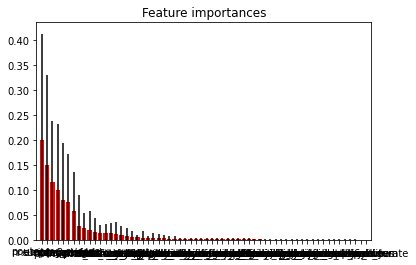

In [55]:
importances = RF_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(df.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(df.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df.shape[1]), np.array(features)[indices])
plt.xlim([-1, df.shape[1]])
plt.ylim([0, None])

In [56]:
RF = RandomForestClassifier()

In [57]:
cv = StratifiedKFold(n_splits=10,shuffle =True)


In [58]:
RF_clf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=750,
                       n_jobs=None, oob_score=False, random_state=60, verbose=0,
                       warm_start=False)

In [59]:
y_predict = RF_clf.predict(x_test)


In [60]:
print("Dummy ACC: %.2f" % acc(y_test, RF_clf.predict(x_test)))

Dummy ACC: 0.90


In [61]:
RF_conf_mat = confusion_matrix(y_test, y_predict)
print("Confusion Matrix")
print(RF_conf_mat)
print('\n')
print("Classification Report")
print(classification_report(y_test, y_predict))

Confusion Matrix
[[ 148  780]
 [  73 7237]]


Classification Report
              precision    recall  f1-score   support

           0       0.67      0.16      0.26       928
           1       0.90      0.99      0.94      7310

    accuracy                           0.90      8238
   macro avg       0.79      0.57      0.60      8238
weighted avg       0.88      0.90      0.87      8238



In [62]:
RF_grid = GridSearchCV(RF, param_grid,cv = cv, verbose = 50, n_jobs=-1)

NameError: ignored

In [ ]:
RF_grid.fit(x_train,y_train)
